In [3]:
from func import load_recipe, recipe_preprocessing, split_ingredient, recipe_food_matrix

In [52]:
raw = load_recipe(n = 100)
processed_recipe = recipe_preprocessing(raw)
recipe   = split_ingredient(processed_recipe)
matrix_raw = recipe_food_matrix(recipe)


c:\Users\HwijunKwon\github\recipe\models\func.py:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result.drop(del_idx, inplace=True)
c:\Users\HwijunKwon\github\recipe\models\func.py:62: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result.drop(title_idx, inplace=True)
100%|██████████| 96/96 [00:00<00:00, 543.78it/s]


Row 29: 
Row 30: 
Row 40: 


In [53]:
matrix = matrix_raw.drop(columns=['recipe_title'])

In [17]:
import numpy as np
U_1, S_1, V_1 = np.linalg.svd(matrix)

In [67]:
matrix.head(3)

,간마늘,들기름,돼지고기앞다리,매실청,맛밤,마늘,돼지고기다짐육,후추적당량,샘표낚지볶음소스,순두부(연두부),...,육수용멸치몇개,고기불고기감,다시마우린물,멸치육수(만능육수),모짜렐라치즈적당량,청양고추,송송썬대파,배,콩나물,조선간장
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,300.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [61]:

std = np.std(matrix, axis=0)
matrix_standardized = (matrix - mean) / std

In [ ]:
matrix.sum()

In [69]:
mean

0     1.441092
1     0.534004
2     0.696839
3     0.902299
4     3.998084
        ...   
91    0.316092
92    0.772989
93    0.724138
94    0.287356
95    1.336207
Length: 96, dtype: float64

In [68]:
mean = np.mean(matrix, axis=1)
(mean == 0.0).sum()

9

In [62]:
import scipy.linalg as la
U_2, S_2, V_2 = la.svd(matrix_standardized)

ValueError: array must not contain infs or NaNs

In [25]:
from sklearn.decomposition import TruncatedSVD
svd = TruncatedSVD(n_components=100)
U_3 = svd.fit_transform(matrix)
S_3 = svd.singular_values_
V_3 = svd.components_

In [42]:
US_1 = U_1[:, :10].dot(np.diag(S_1[:10]))
VS_1 = V_1.T[:, :10].dot(np.diag(S_1[:10]))

In [35]:
US_2 = U_2[:, :10].dot(np.diag(S_2[:10]))

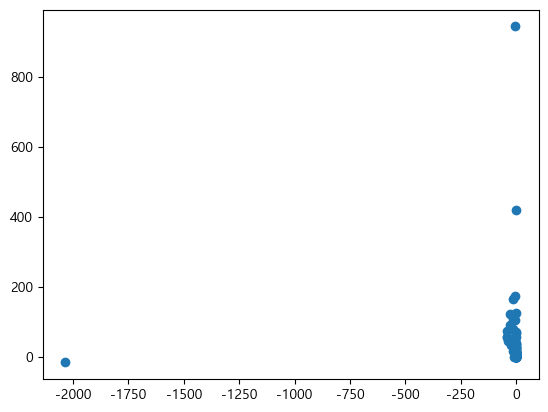

In [59]:
import matplotlib.pyplot as plt

plt.scatter(US_1[:, 0], US_1[: ,1])


In [60]:
matrix

,간마늘,들기름,돼지고기앞다리,매실청,맛밤,마늘,돼지고기다짐육,후추적당량,샘표낚지볶음소스,순두부(연두부),...,육수용멸치몇개,고기불고기감,다시마우린물,멸치육수(만능육수),모짜렐라치즈적당량,청양고추,송송썬대파,배,콩나물,조선간장
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,300.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
92,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
93,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
94,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [48]:
matrix_norm = matrix/np.linalg.norm(matrix, axis=1, keepdims=True)

In [50]:
import numpy as np
U_1, S_1, V_1 = np.linalg.svd(matrix_norm)

US_1 = U_1[:, :10].dot(np.diag(S_1[:10]))
VS_1 = V_1.T[:, :10].dot(np.diag(S_1[:10]))

LinAlgError: SVD did not converge

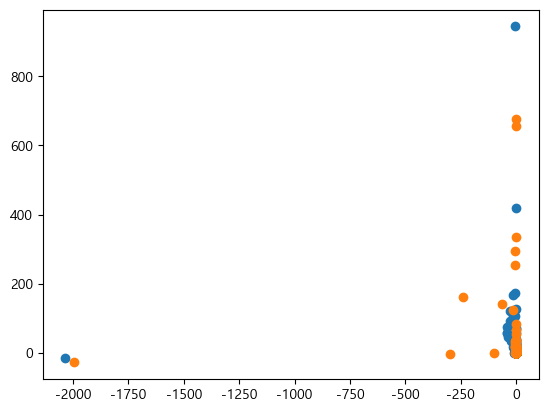

In [47]:
import matplotlib.pyplot as plt

plt.scatter(US_1[:, 0], US_1[: ,1])
plt.scatter(VS_1[:, 0], VS_1[: ,1])